In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_1=pd.read_csv('ENB2012_data.csv')

In [3]:
df_1.shape

(768, 10)

In [4]:
df_1.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

Interpolation Between Random Rows

You can create new rows as weighted averages of existing rows:

In [5]:
n_new = 2000 - len(df_1)
rows = []

for _ in range(n_new):
    i, j = np.random.choice(len(df_1), 2, replace=False)
    alpha = np.random.rand()
    new_row = alpha * df_1.iloc[i] + (1 - alpha) * df_1.iloc[j]
    rows.append(new_row)

df_interpolated = pd.DataFrame(rows, columns=df_1.columns)
df_upsampled = pd.concat([df_1, df_interpolated], ignore_index=True)

print(df_upsampled.shape)


(2000, 10)


In [6]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2000 non-null   float64
 1   X2      2000 non-null   float64
 2   X3      2000 non-null   float64
 3   X4      2000 non-null   float64
 4   X5      2000 non-null   float64
 5   X6      2000 non-null   float64
 6   X7      2000 non-null   float64
 7   X8      2000 non-null   float64
 8   Y1      2000 non-null   float64
 9   Y2      2000 non-null   float64
dtypes: float64(10)
memory usage: 156.4 KB


In [7]:
df_upsampled.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [8]:
df_upsampled.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [9]:
df_upsampled.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.765890,670.352465,318.952550,175.699957,5.287620,3.507954,0.232664,2.798029,22.512227,24.842166
std,0.094123,78.524368,38.953866,39.922093,1.550337,1.001253,0.118305,1.398218,8.923363,8.438163
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.010000,10.900000
25%,0.690000,612.500000,294.000000,145.762400,3.500000,2.820403,0.102439,1.822579,14.461428,16.807500
50%,0.759082,667.131054,318.500000,174.752850,5.380257,3.560458,0.250000,3.000000,21.756103,24.399605
75%,0.826291,735.000000,343.000000,220.500000,7.000000,4.238440,0.337302,4.000000,29.532500,31.652740
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,43.100000,48.030000


In [10]:
df_upsampled.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [11]:
df_upsampled.duplicated().sum()

0

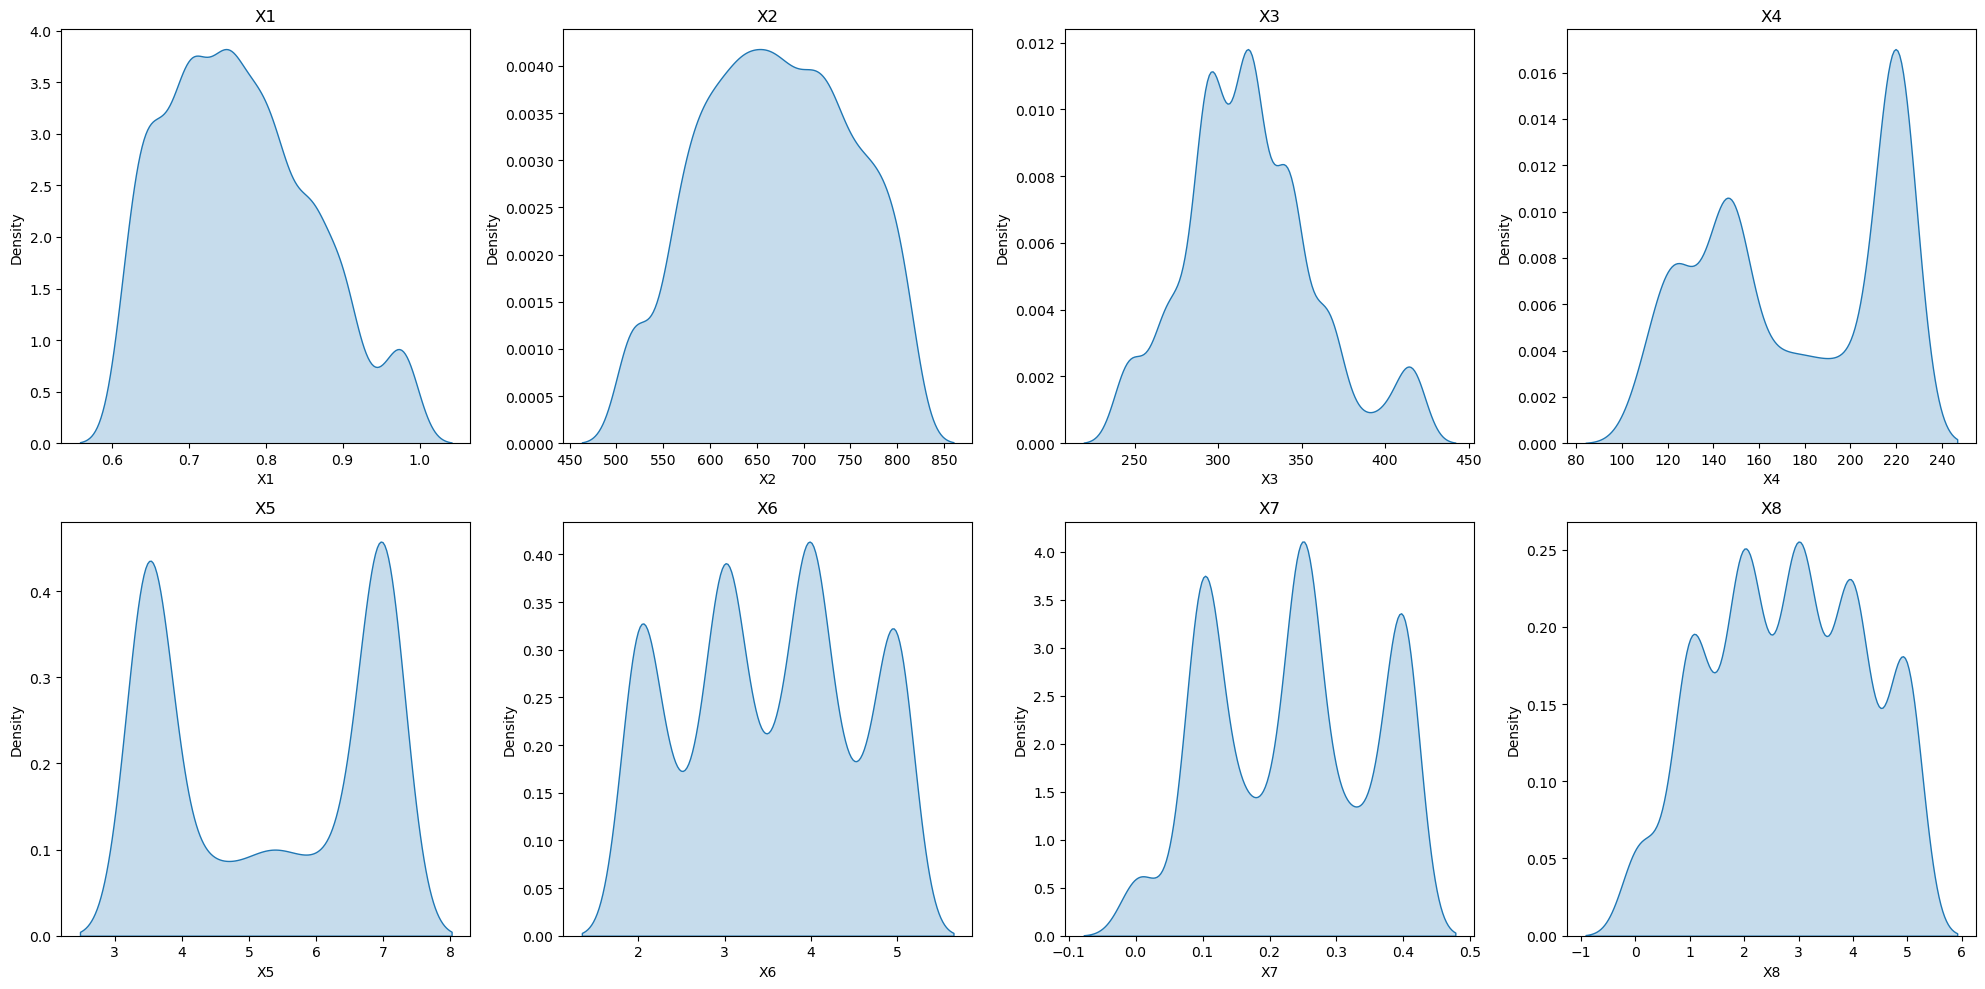

In [12]:
plt.figure(figsize=(20,10))

for i, col in enumerate(['X1','X2','X3','X4','X5','X6','X7','X8'], 1):
    plt.subplot(2,4,i)
    sns.kdeplot(df_upsampled[col], fill=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [13]:
df_upsampled.skew()

X1    0.419096
X2   -0.060887
X3    0.504490
X4   -0.110011
X5   -0.047855
X6   -0.024391
X7   -0.031616
X8   -0.071080
Y1    0.329355
Y2    0.347429
dtype: float64

In [14]:
df_upsampled['X1']=np.log(df_upsampled['X1'])
df_upsampled['X3']=np.log1p(df_upsampled['X3'])

In [15]:
df_upsampled.skew()

X1    0.201326
X2   -0.060887
X3    0.148202
X4   -0.110011
X5   -0.047855
X6   -0.024391
X7   -0.031616
X8   -0.071080
Y1    0.329355
Y2    0.347429
dtype: float64

In [16]:
df_upsampled.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000,-0.996887,-0.215189,-0.870228,0.837023,0.001737,-0.008643,-0.000641,0.629471,0.645880
X2,-0.996887,1.000000,0.205064,0.879128,-0.856674,-0.003277,0.008490,0.000912,-0.652961,-0.670733
X3,-0.215189,0.205064,1.000000,-0.284467,0.276047,-0.026306,0.001428,-0.006582,0.452659,0.421828
X4,-0.870228,0.879128,-0.284467,1.000000,-0.971472,0.009245,0.007389,0.004307,-0.859911,-0.861216
X5,0.837023,-0.856674,0.276047,-0.971472,1.000000,-0.005811,-0.010896,-0.005205,0.887172,0.895388
X6,0.001737,-0.003277,-0.026306,0.009245,-0.005811,1.000000,-0.009543,0.003767,-0.018691,0.004049
X7,-0.008643,0.008490,0.001428,0.007389,-0.010896,-0.009543,1.000000,0.225416,0.260690,0.191266
X8,-0.000641,0.000912,-0.006582,0.004307,-0.005205,0.003767,0.225416,1.000000,0.082025,0.040572
Y1,0.629471,-0.652961,0.452659,-0.859911,0.887172,-0.018691,0.260690,0.082025,1.000000,0.973563
Y2,0.645880,-0.670733,0.421828,-0.861216,0.895388,0.004049,0.191266,0.040572,0.973563,1.000000


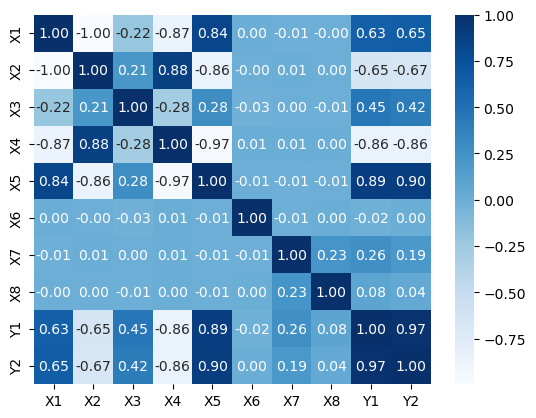

In [17]:
sns.heatmap(df_upsampled.corr(),annot=True,fmt=".2f",cmap='Blues')
plt.show()

Specifically:
X1 Relative Compactness
X2 Surface Area
X3 Wall Area
X4 Roof Area
X5 Overall Height
X6 Orientation
X7 Glazing Area
X8 Glazing Area Distribution
y1 Heating Load
y2 Cooling Load

In [18]:
df_upsampled=df_upsampled.drop(columns=['X2','X4'])

In [19]:
df_upsampled.head()

,X1,X3,X5,X6,X7,X8,Y1,Y2
0,-0.020203,5.686975,7.0,2.0,0.0,0.0,15.55,21.33
1,-0.020203,5.686975,7.0,3.0,0.0,0.0,15.55,21.33
2,-0.020203,5.686975,7.0,4.0,0.0,0.0,15.55,21.33
3,-0.020203,5.686975,7.0,5.0,0.0,0.0,15.55,21.33
4,-0.105361,5.766757,7.0,2.0,0.0,0.0,20.84,28.28


In [20]:
df_upsampled.shape

(2000, 8)

In [21]:
df_upsampled.head()

,X1,X3,X5,X6,X7,X8,Y1,Y2
0,-0.020203,5.686975,7.0,2.0,0.0,0.0,15.55,21.33
1,-0.020203,5.686975,7.0,3.0,0.0,0.0,15.55,21.33
2,-0.020203,5.686975,7.0,4.0,0.0,0.0,15.55,21.33
3,-0.020203,5.686975,7.0,5.0,0.0,0.0,15.55,21.33
4,-0.105361,5.766757,7.0,2.0,0.0,0.0,20.84,28.28


In [23]:
df_upsampled.columns

Index(['X1', 'X3', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [22]:
df_upsampled.to_csv('cleaned_dataset.csv',index=False)